In [1]:
from transformation import Sequential
from utils import MLPSymmetryHelper, expected_number_of_chains, bounded_expected_number_of_chains
import flax.linen as nn
import jax
import jax.numpy as jnp

rng_key = jax.random.PRNGKey(0)

In [2]:
t = Sequential([
    nn.Dense(3),
    nn.tanh,
    nn.Dense(1)
])

In [3]:
rng_key, rng_key_ = jax.random.split(rng_key)
sh = MLPSymmetryHelper(
    parameters_template=t.init(rng_key_, jnp.ones((1, 1))),
    activation_function="tanh"
)

In [4]:
symmetries = sh.symmetries_size()
identifiable_modes = 1
total_modes = symmetries * identifiable_modes
chains = expected_number_of_chains(n=total_modes)
chains_bounded = bounded_expected_number_of_chains(n=total_modes, p=0.99)

In [5]:
print(symmetries, identifiable_modes, chains, chains_bounded)

48 1 214.02228 21402.229


In [8]:
symmetries = jnp.arange(1, 1 + 1024)
y = []
for m in range(1, 4):
    print(m)
    modes = []
    expected = []
    bounded_expected = []
    for s in symmetries:
        #print(s)
        total_modes = m * s
        chains = expected_number_of_chains(n=total_modes)
        chains_bounded = bounded_expected_number_of_chains(n=total_modes, p=0.99)
        modes.append(total_modes)
        expected.append(chains)
        bounded_expected.append(chains_bounded)
    y.append([modes, expected, bounded_expected])

1
2
3


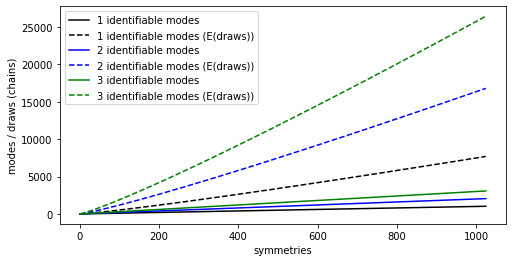

In [34]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 4))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel("symmetries")
ax.set_ylabel("modes / draws (chains)")

ax.plot(symmetries, y[0][0], label="1 identifiable modes", color="black", linestyle="solid")
ax.plot(symmetries, y[0][1], label="1 identifiable modes (E(draws))", color="black", linestyle="dashed")

ax.plot(symmetries, y[1][0], label="2 identifiable modes", color="blue", linestyle="solid")
ax.plot(symmetries, y[1][1], label="2 identifiable modes (E(draws))", color="blue", linestyle="dashed")

ax.plot(symmetries, y[2][0], label="3 identifiable modes", color="green", linestyle="solid")
ax.plot(symmetries, y[2][1], label="3 identifiable modes (E(draws))", color="green", linestyle="dashed")
ax.legend()